# Exploration of the Global Data on COVID-19 Cases and Deaths

The COVID-19 dataset was taken from the web-site "Our World in Data":

https://ourworldindata.org/covid-deaths

## Data Loading and Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\staru\anaconda3\envs\practicum\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("C:/Users/staru/Documents/Projects/Covid/covid_data.csv")

In [3]:
# selecting the columns needed for the analysis
df = df[['continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population']]
df.sample(5)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
142054,Europe,Germany,2024-07-05,38437756.0,NaN,174979.0,NaN,83369840
146613,Europe,Greece,2023-03-30,5261344.0,0.0,36609.0,0.0,10384972
158996,Africa,Guinea-Bissau,2020-06-24,1541.0,0.0,17.0,0.0,2105580
107417,North America,El Salvador,2020-09-20,27428.0,577.0,808.0,26.0,6336393
72525,South America,Chile,2021-06-17,1468992.0,0.0,30579.0,0.0,19603736


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   continent     402910 non-null  object 
 1   location      429435 non-null  object 
 2   date          429435 non-null  object 
 3   total_cases   411804 non-null  float64
 4   new_cases     410159 non-null  float64
 5   total_deaths  411804 non-null  float64
 6   new_deaths    410608 non-null  float64
 7   population    429435 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 26.2+ MB


Let's convert the data in the date column to the appropriate format.

In [5]:
# converting the dates to datetime format
df['date'] = pd.to_datetime(df['date'])

In the column with continents, some rows contain missing values, let's look at the locations in such rows.

In [6]:
# rows with missing values in the 'continent' column
df[df['continent'].isna()].groupby('location', as_index=False)['new_cases'].sum()

,location,new_cases
0,Africa,13146831.0
1,Asia,301564180.0
2,Europe,252916868.0
3,European Union (27),185822587.0
4,High-income countries,429044052.0
5,Low-income countries,1944687.0
6,Lower-middle-income countries,92019711.0
7,North America,124492698.0
8,Oceania,15003468.0
9,South America,68811012.0


Now let's look at the rows where the continent is specified.

In [7]:
# total number of cases by continent
df[~df['continent'].isna()].groupby('continent', as_index=False)['new_cases'].sum()

,continent,new_cases
0,Africa,13146831.0
1,Asia,301564180.0
2,Europe,252916868.0
3,North America,124492698.0
4,Oceania,15003468.0
5,South America,68811012.0


As it turns out, in the rows where there are missing values in the "continent" column, the "location" column contains aggregated data on cases and deaths instead of countries. Therefore, the data in the dataframe is duplicated.

In [8]:
# removing rows with missing values in the 'continent' column
# to avoid data duplication
df = df.dropna(subset=['continent']).reset_index(drop=True)

Let's remove the non-informative rows where there is no data on cases or deaths.

In [9]:
# rows where total_cases, total_deaths, new_cases, and new_deaths are all NaN
df[
    df['total_cases'].isna() & 
    df['total_deaths'].isna() & 
    df['new_cases'].isna() & 
    df['new_deaths'].isna()
]

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
13392,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,45510324
13393,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,45510324
13394,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,45510324
13395,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,45510324
90400,Europe,Czechia,2024-08-05,NaN,NaN,NaN,NaN,10493990
...,...,...,...,...,...,...,...,...
396209,Europe,Wales,2023-07-09,NaN,NaN,NaN,NaN,3170000
396210,Europe,Wales,2023-07-10,NaN,NaN,NaN,NaN,3170000
396211,Europe,Wales,2023-07-11,NaN,NaN,NaN,NaN,3170000
396212,Europe,Wales,2023-07-12,NaN,NaN,NaN,NaN,3170000


In [10]:
# removing rows where total_cases, total_deaths, new_cases, and new_deaths are all NaN
df = (
    df.dropna(
        subset=['total_cases', 'total_deaths', 'new_cases', 'new_deaths'],
        how='all'
    )
    .reset_index(drop=True)
)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391716 entries, 0 to 391715
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   continent     391716 non-null  object        
 1   location      391716 non-null  object        
 2   date          391716 non-null  datetime64[ns]
 3   total_cases   391716 non-null  float64       
 4   new_cases     390071 non-null  float64       
 5   total_deaths  391716 non-null  float64       
 6   new_deaths    390520 non-null  float64       
 7   population    391716 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 23.9+ MB


After removing, there are still missing values in the 'new_cases' and 'new_deaths' columns.

In [12]:
df[df['new_cases'].isna() | df['new_deaths'].isna()]

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
19709,Oceania,Australia,2023-07-23,11555995.0,6495.0,22694.0,NaN,26177410
34306,North America,Belize,2022-04-10,57287.0,NaN,664.0,8.0,405285
42501,North America,Bonaire Sint Eustatius and Saba,2021-10-17,2306.0,102.0,19.0,NaN,27052
56530,Africa,Burundi,2023-07-16,54216.0,NaN,15.0,0.0,12889583
61160,North America,Canada,2022-06-19,3915721.0,23312.0,41017.0,NaN,38454328
...,...,...,...,...,...,...,...,...
373299,North America,United States,2024-08-02,103436829.0,NaN,1192546.0,0.0,338289856
373300,North America,United States,2024-08-03,103436829.0,NaN,1192546.0,0.0,338289856
373301,North America,United States,2024-08-04,103436829.0,NaN,1193165.0,619.0,338289856
373582,North America,United States Virgin Islands,2020-10-11,1324.0,NaN,20.0,0.0,99479


The missing values are obviously caused by the fact that the rows contain new information for only one variable — either new cases or deaths. Let's fill the remaining missing values with zeros.

In [13]:
# filling NaN values in the 'new_cases' and 'new_deaths' column with zeros
df['new_cases'] = df['new_cases'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391716 entries, 0 to 391715
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   continent     391716 non-null  object        
 1   location      391716 non-null  object        
 2   date          391716 non-null  datetime64[ns]
 3   total_cases   391716 non-null  float64       
 4   new_cases     391716 non-null  float64       
 5   total_deaths  391716 non-null  float64       
 6   new_deaths    391716 non-null  float64       
 7   population    391716 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 23.9+ MB


In [15]:
# period of analysis
pd.DataFrame({
    'Min Date': [df['date'].min()],
    'Max Date': [df['date'].max()]
})

,Min Date,Max Date
0,2020-01-05,2024-08-04


The dataframe contains data for the period from January 5, 2020, to August 4, 2024.

In [16]:
# saving the filtered data
df.to_csv('covid_filtered.csv', index=False)

## Trends in New Cases and Mortality 

In [17]:
daily_new = df.pivot_table(index='date', values=['new_cases', 'new_deaths'], aggfunc='sum').reset_index()
daily_new

,date,new_cases,new_deaths
0,2020-01-05,2.0,3.0
1,2020-01-06,0.0,0.0
2,2020-01-07,0.0,0.0
3,2020-01-08,0.0,0.0
4,2020-01-09,0.0,0.0
...,...,...,...
1669,2024-07-31,0.0,0.0
1670,2024-08-01,0.0,0.0
1671,2024-08-02,0.0,0.0
1672,2024-08-03,0.0,0.0


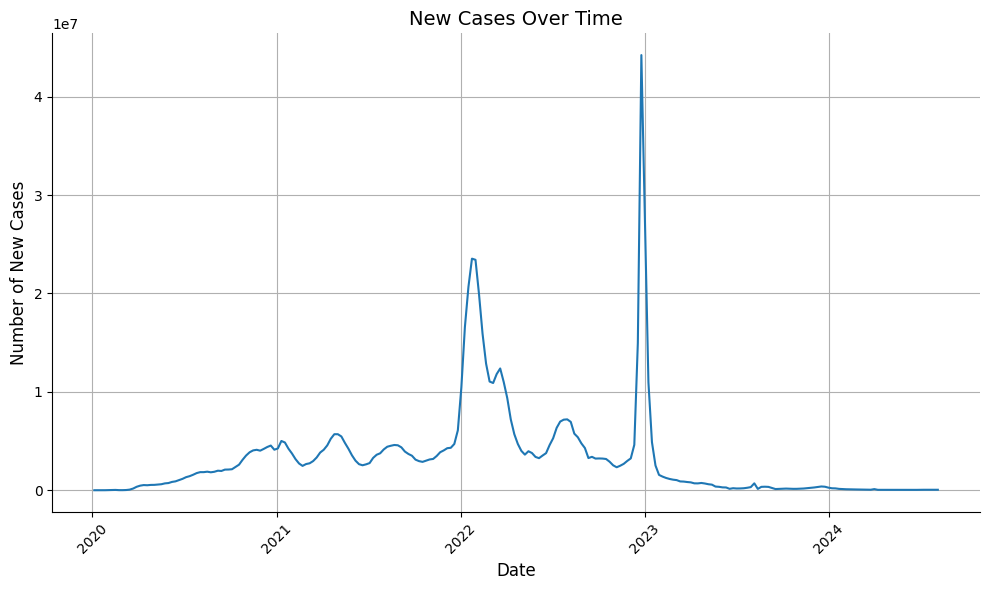

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_new[daily_new['new_cases'] != 0], x='date', y='new_cases')

sns.despine()

plt.title('New Cases Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of New Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

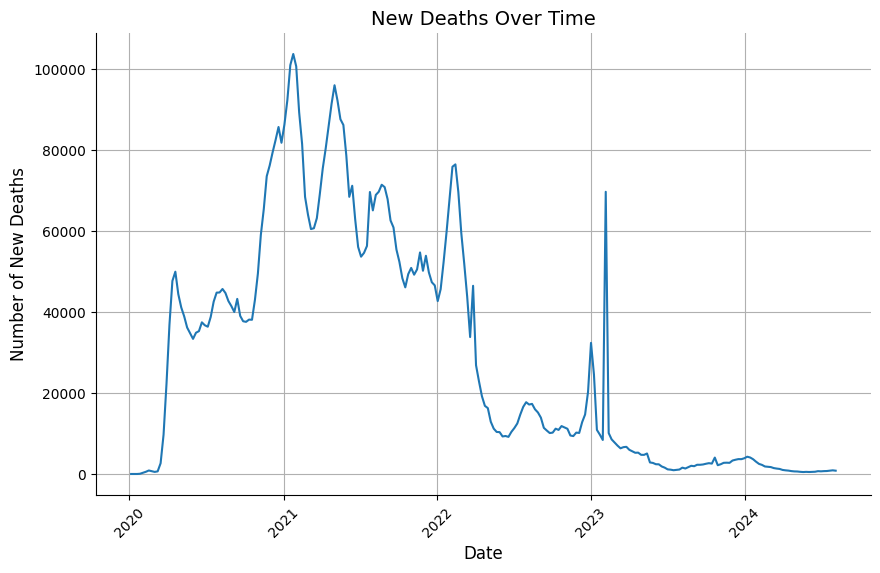

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_new[daily_new['new_deaths'] != 0], x='date', y='new_deaths')

sns.despine()

plt.title('New Deaths Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of New Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

## Infection and Deaths Percentage by Country 

In [20]:
# data by country
locations = (
    df.groupby(['continent', 'location'], as_index=False)[['population', 'new_cases', 'new_deaths']]
    .agg({'population': 'first', 'new_cases': 'sum', 'new_deaths': 'sum'})
    .rename(columns={'new_cases': 'total_cases', 'new_deaths': 'total_deaths'})
)
locations.head()

,continent,location,population,total_cases,total_deaths
0,Africa,Algeria,44903228,272139.0,6881.0
1,Africa,Angola,35588996,107481.0,1937.0
2,Africa,Benin,13352864,28036.0,163.0
3,Africa,Botswana,2630300,330696.0,2801.0
4,Africa,Burkina Faso,22673764,22139.0,400.0


In [21]:
# percentage of infected people by country
locations['infected_people_percentage'] = (locations['total_cases'] / locations['population'] * 100).round(2)

# percentage of people died by country
locations['people_died_percentage'] = (locations['total_deaths'] / locations['population'] * 100).round(2)

locations.head()

,continent,location,population,total_cases,total_deaths,infected_people_percentage,people_died_percentage
0,Africa,Algeria,44903228,272139.0,6881.0,0.61,0.02
1,Africa,Angola,35588996,107481.0,1937.0,0.30,0.01
2,Africa,Benin,13352864,28036.0,163.0,0.21,0.00
3,Africa,Botswana,2630300,330696.0,2801.0,12.57,0.11
4,Africa,Burkina Faso,22673764,22139.0,400.0,0.10,0.00


In [22]:
# countries with the highest proportion of people ever infected with COVID
top_infected_countries = (
    locations[['continent', 'location', 'infected_people_percentage']]
    .sort_values('infected_people_percentage', ascending=False)
)
top_infected_countries.head()

,continent,location,infected_people_percentage
112,Europe,Cyprus,77.72
63,Asia,Brunei,77.44
145,Europe,San Marino,75.07
106,Europe,Austria,68.04
93,Asia,South Korea,66.72


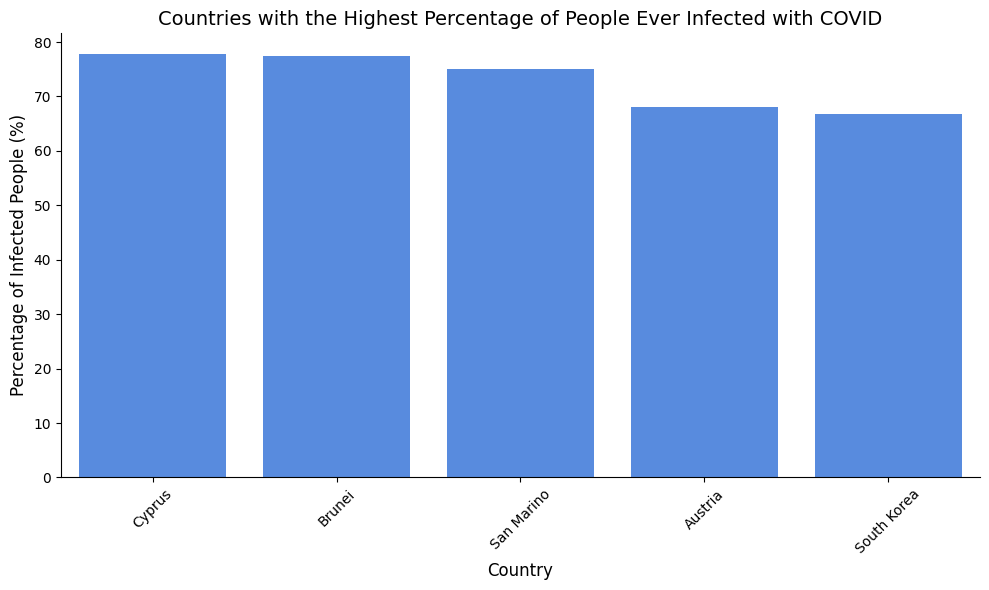

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='infected_people_percentage', data=top_infected_countries.head(), color='#4285F4')
sns.despine()

plt.title('Countries with the Highest Percentage of People Ever Infected with COVID', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Infected People (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [24]:
# countries with the highest number of deaths from COVID per capita
top_died_countries = (
    locations[['continent', 'location', 'people_died_percentage']]
    .sort_values('people_died_percentage', ascending=False)
)
top_died_countries.head(7)

,continent,location,people_died_percentage
230,South America,Peru,0.65
110,Europe,Bulgaria,0.57
109,Europe,Bosnia and Herzegovina,0.51
123,Europe,Hungary,0.49
148,Europe,Slovenia,0.48
139,Europe,North Macedonia,0.48
111,Europe,Croatia,0.47


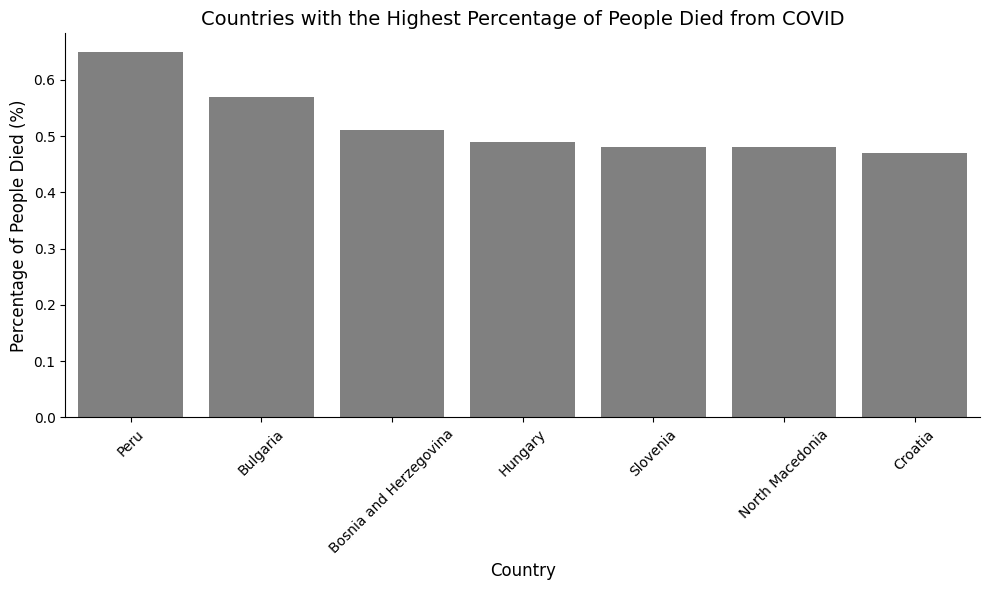

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='people_died_percentage', data=top_died_countries.head(7), color='Grey')
sns.despine()

plt.title('Countries with the Highest Percentage of People Died from COVID', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of People Died (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Infection and Deaths Percentage by Continent 

In [26]:
# data by continent
continents = (
    locations.groupby('continent', as_index=False)[['population', 'total_cases', 'total_deaths']]
    .agg('sum')
)

# percentage of infected people by continent
continents['infected_people_percentage'] = (continents['total_cases'] / continents['population'] * 100).round(2)

# percentage of people died by continent
continents['people_died_percentage'] = (continents['total_deaths'] / continents['population'] * 100).round(2)

continents

,continent,population,total_cases,total_deaths,infected_people_percentage,people_died_percentage
0,Africa,1426160609,13146831.0,259121.0,0.92,0.02
1,Asia,4689377951,301564180.0,1637335.0,6.43,0.03
2,Europe,747411270,252916868.0,2102377.0,33.84,0.28
3,North America,600323657,124492698.0,1671512.0,20.74,0.28
4,Oceania,45038907,15003468.0,33024.0,33.31,0.07
5,South America,436816679,68811012.0,1357619.0,15.75,0.31


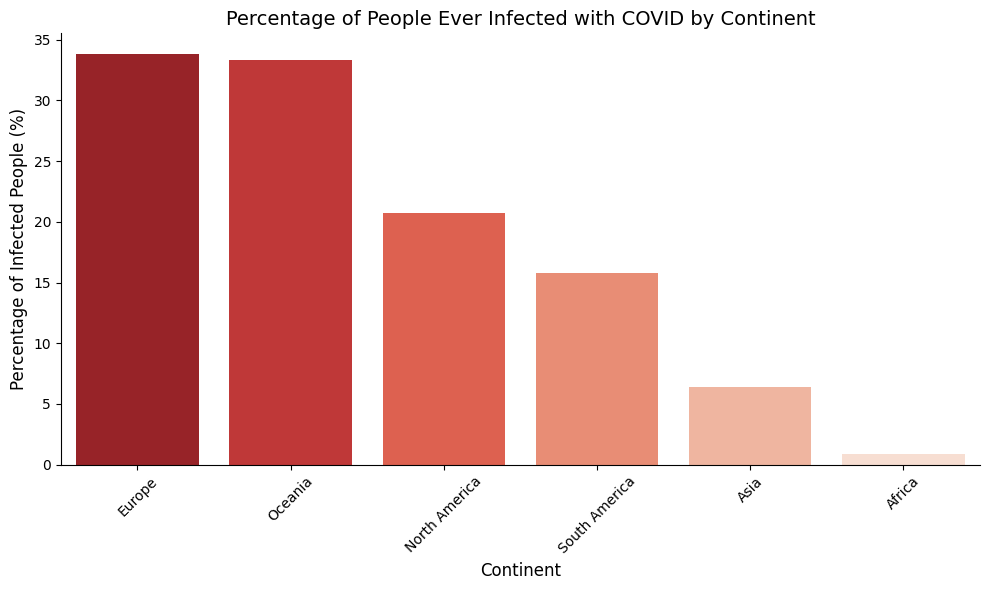

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='continent',
    y='infected_people_percentage',
    data=continents.sort_values('infected_people_percentage', ascending=False),
    palette='Reds_r'
)
sns.despine()

plt.title('Percentage of People Ever Infected with COVID by Continent', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Percentage of Infected People (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

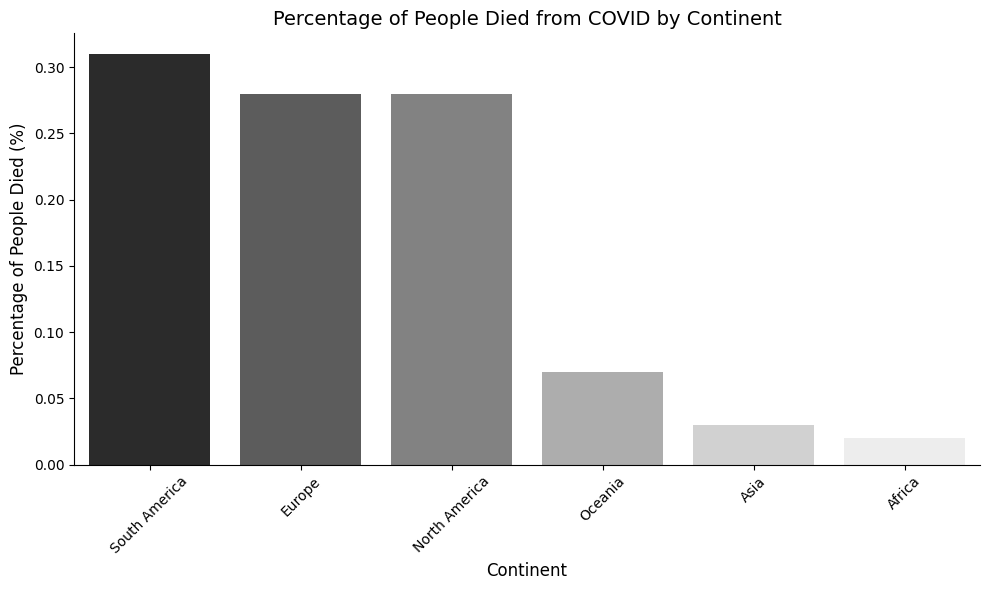

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='continent',
    y='people_died_percentage',
    data=continents.sort_values('people_died_percentage', ascending=False),
    palette='Greys_r'
)
sns.despine()

plt.title('Percentage of People Died from COVID by Continent', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Percentage of People Died (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Worldwide Dynamics of Infection and Death Percentages

In [29]:
daily_total = df.pivot_table(index='date', values=['total_cases', 'total_deaths', 'population'], aggfunc='sum').reset_index()
daily_total

,date,population,total_cases,total_deaths
0,2020-01-05,7945129073,2.0,3.0
1,2020-01-06,7945129073,2.0,3.0
2,2020-01-07,7945129073,2.0,3.0
3,2020-01-08,7945129073,2.0,3.0
4,2020-01-09,7945129073,2.0,3.0
...,...,...,...,...
1669,2024-07-31,7945129073,775819614.0,7056317.0
1670,2024-08-01,7945129073,775819614.0,7056317.0
1671,2024-08-02,7945129073,775819614.0,7056317.0
1672,2024-08-03,7945129073,775819614.0,7056317.0


In [30]:
# percentage of infected people
daily_total['infected_people_percentage'] = daily_total['total_cases'] / daily_total['population'] * 100

# percentage of people died
daily_total['people_died_percentage'] = daily_total['total_deaths'] / daily_total['population'] * 100

In [31]:
daily_total

,date,population,total_cases,total_deaths,infected_people_percentage,people_died_percentage
0,2020-01-05,7945129073,2.0,3.0,2.517266e-08,3.775898e-08
1,2020-01-06,7945129073,2.0,3.0,2.517266e-08,3.775898e-08
2,2020-01-07,7945129073,2.0,3.0,2.517266e-08,3.775898e-08
3,2020-01-08,7945129073,2.0,3.0,2.517266e-08,3.775898e-08
4,2020-01-09,7945129073,2.0,3.0,2.517266e-08,3.775898e-08
...,...,...,...,...,...,...
1669,2024-07-31,7945129073,775819614.0,7056317.0,9.764720e+00,8.881312e-02
1670,2024-08-01,7945129073,775819614.0,7056317.0,9.764720e+00,8.881312e-02
1671,2024-08-02,7945129073,775819614.0,7056317.0,9.764720e+00,8.881312e-02
1672,2024-08-03,7945129073,775819614.0,7056317.0,9.764720e+00,8.881312e-02


In [32]:
pd.DataFrame(daily_total.loc[daily_total['date'].idxmax()]).T.reset_index(drop=True)

,date,population,total_cases,total_deaths,infected_people_percentage,people_died_percentage
0,2024-08-04,7945129073,775866783.0,7057132.0,9.765314,0.088823


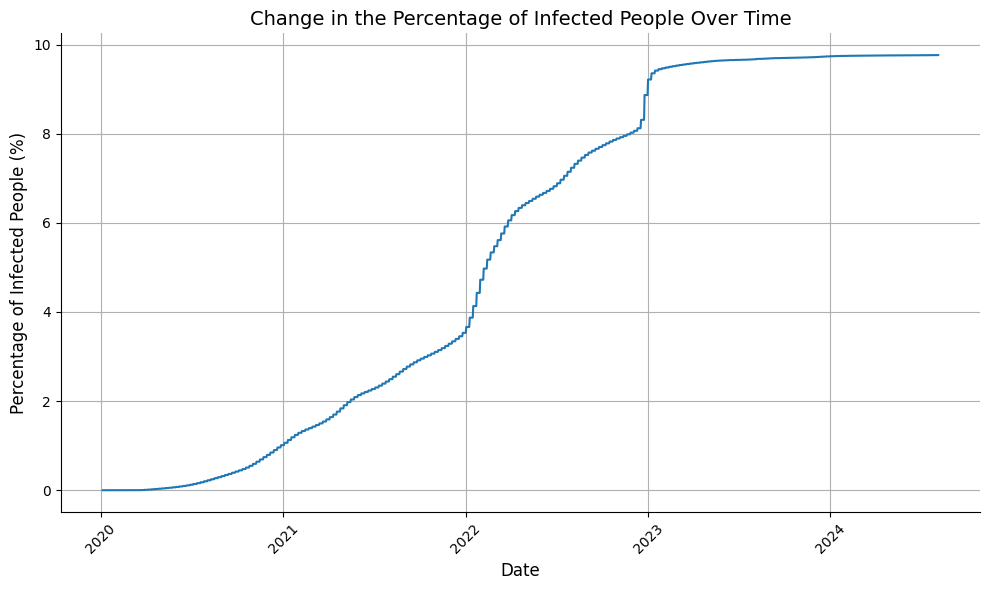

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_total, x='date', y='infected_people_percentage', ci=None)
sns.despine()

plt.title('Change in the Percentage of Infected People Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of Infected People (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

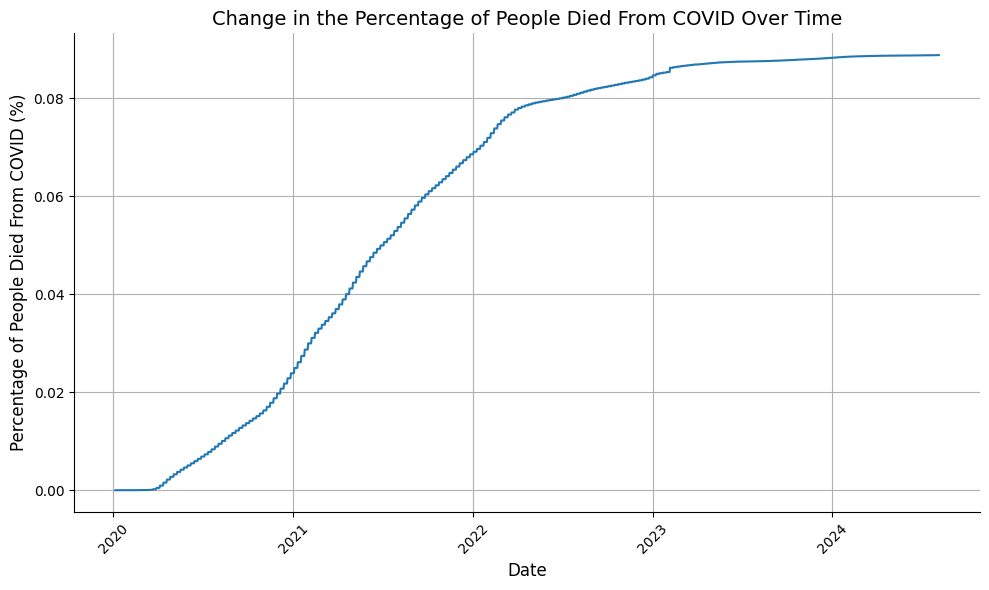

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_total, x='date', y='people_died_percentage', ci=None)
sns.despine()

plt.title('Change in the Percentage of People Died From COVID Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of People Died From COVID (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

## Dynamics of Infection and Death Percentages Across Several Countries 

In [35]:
country_list = ['Spain', 'France', 'Germany', 'Russia', 'China']
locations[locations['location'].isin(country_list)]

,continent,location,population,total_cases,total_deaths,infected_people_percentage,people_died_percentage
65,Asia,China,1425887360,99373219.0,122326.0,6.97,0.01
118,Europe,France,67813000,38997490.0,167985.0,57.51,0.25
119,Europe,Germany,83369840,38437756.0,174979.0,46.11,0.21
144,Europe,Russia,144713312,24268728.0,403188.0,16.77,0.28
149,Europe,Spain,47558632,13980340.0,121852.0,29.40,0.26


In [37]:
# percentage of infected people
df['infected_people_percentage'] = df['total_cases'] / df['population'] * 100

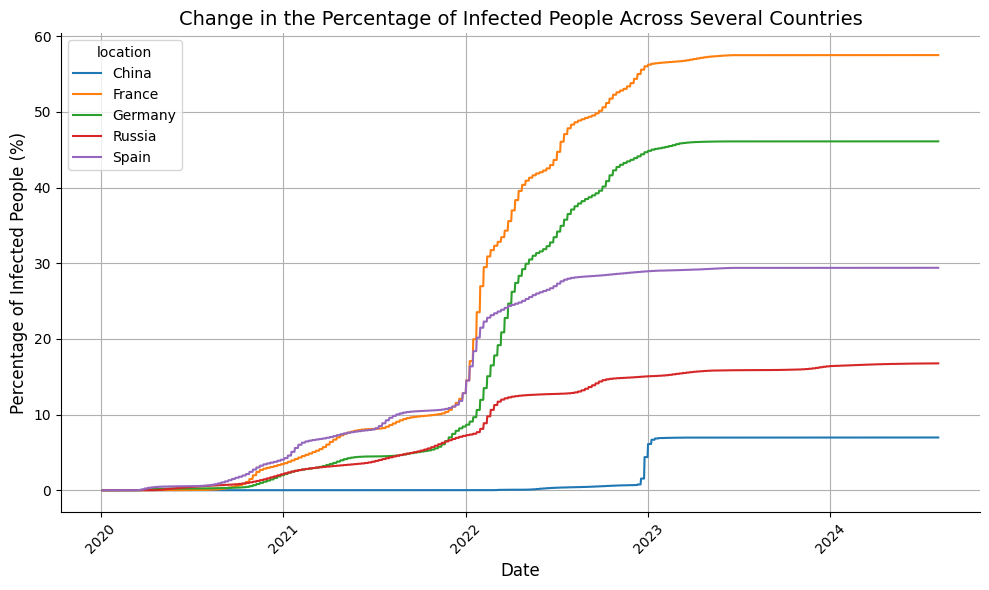

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['location'].isin(country_list)], x='date', y='infected_people_percentage', hue='location')
sns.despine()

plt.title('Change in the Percentage of Infected People Across Several Countries', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of Infected People (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

## Countries with the Highest Deaths Percentage Among the Infected

In [ ]:
# probability of death from COVID by country
locations['death_cases_percentage'] = (locations['total_deaths'] / locations['total_cases'] * 100).round(2)

locations.head()

In [ ]:
# countries with the highest probability of death from COVID
locations[['location', 'death_cases_percentage']].sort_values('death_cases_percentage', ascending=False).head()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='death_cases_percentage', data=locations.sort_values('death_cases_percentage', ascending=False).head(), color='#4285F4')
sns.despine()

plt.title('Countries with the Highest COVID Death Probability', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Death Cases Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()